# pulse2percept: Processing Videos

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from skvideo import datasets

import pulse2percept as p2p

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2017-07-11 17:48:34,414 [pulse2percept] [INFO] Welcome to pulse2percept


## 1. Setting up the Simulation

### 1.1 Setting up the Implant

These steps are equivalent to [0.0-example-usage.ipynb](0.0-example-usage.ipynb):

In [2]:
# Place an Argus I array centered on the fovea
argus = p2p.implants.ArgusII(h=0)

In [3]:
sim = p2p.Simulation(argus, engine='joblib', num_jobs=8)

In [4]:
# Set parameters of the optic fiber layer (OFL)
# In previous versions of the model, this used to be called the `Retina`
# object, which created a spatial grid and generated the axtron streak map.

# Set the spatial sampling step of the retina (microns)
s_sample = 200
sim.set_optic_fiber_layer(sampling=s_sample)

In [5]:
# Set parameters of the ganglion cell layer (GCL)
# In previous versions of the model, this used to be called `TemporalModel`.

# Set the temporal sampling step (seconds) for all GCL computations
t_sample = 0.01 / 1000
sim.set_ganglion_cell_layer('Nanduri2012', tsample=t_sample)

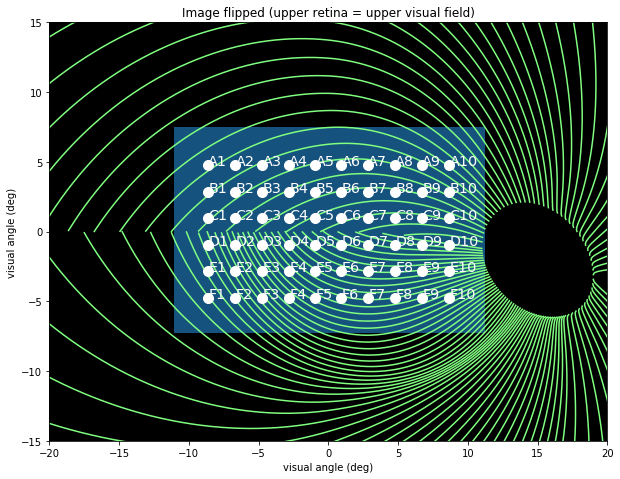

In [6]:
sim.plot_fundus();

## 1.2 Setting up the Stimulus

The easiest way to convert a video into a pulse train is to pass a file name to `p2p.stimuli.video2pulsetrain`.
Analogous to `p2p.stimuli.image2pulsetrain`, you can specify the range of values to be used for converting grayscale values between 0 and 255 into either amplitude or frequency values in `valrange`. For amplitude coding, the frequency is held constant at `const_val`, which can also be specified.

The output is a list of pulse trains (one per electrode), where every frame occupies some time window 1/`framerate`:

In [7]:
stim = p2p.stimuli.video2pulsetrain('../../data/kid-pool.avi', argus, valrange=[0, 20],
                                    framerate=30, tsample=t_sample)

2017-07-11 17:48:35,451 [pulse2percept.files] [INFO] Loaded video from file '../../data/kid-pool.avi'.


## 2. Running the Simulation

The `stim` object can be passed directly to `sim.pulse2percept`:

In [8]:
percept = sim.pulse2percept(stim, tol=0.25, layers=['GCL', 'OFL'])

2017-07-11 17:48:39,983 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-07-11 17:48:40,306 [pulse2percept.api] [INFO] tol=25.0%, 601/651 px selected
2017-07-11 17:58:16,731 [pulse2percept.api] [INFO] Done.


## 3. Analyzing the Output

You can again inspect the movie frame by frame, find the brightest frame, or simply store the output to file. Scikit-Video supports at least AVI, MP4, and MOV format.

In [9]:
frame = p2p.get_brightest_frame(percept)

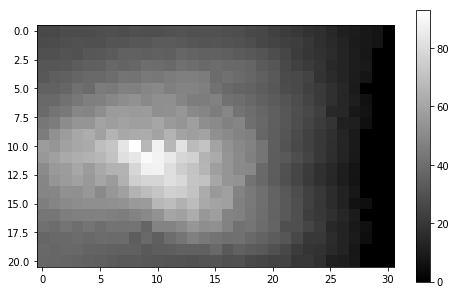

In [10]:
img = np.flipud(frame.data)
plt.figure(figsize=(8, 5))
plt.imshow(np.flipud(img), cmap='gray', vmin=0)
plt.grid('off')
plt.colorbar()

In [11]:
p2p.files.save_video(percept, 'percept-kid-pool.mp4', fps=30)

2017-07-11 17:58:18,078 [pulse2percept.files] [INFO] Saved video to file 'percept-kid-pool.mp4'.
